In [1]:
# Installing Indic NLP library
!pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 5.5 MB/s eta 0:00:00


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Mounting the Google Drive for data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Assigning dataset directory from Google Drive
data_directory = "/content/drive/MyDrive/Social Media Mining/SMM.csv"
test_data_directory = "/content/drive/MyDrive/Social Media Mining/SMM_test.csv"

In [5]:
# Loading train and test data
train_data = pd.read_csv(data_directory)
test_data = pd.read_csv(test_data_directory)

In [6]:
# Splitting the training data into train and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_data['label'], test_size = 0.1, random_state = 123)

train_data = x_train
validation_data = x_val
validation_data = validation_data.drop(columns = ['label'])

In [7]:
train_data.columns

Index(['language', 'post_index', 'commentText', 'report_count_comment',
       'report_count_post', 'like_count_comment', 'like_count_post', 'label',
       'val'],
      dtype='object')

In [8]:
train_data

,language,post_index,commentText,report_count_comment,report_count_post,like_count_comment,like_count_post,label,val
431828,Hindi,328362,9939 sut ke 406mut ke 3041 uth ke,0,0,1,5,0,0
193230,Malayalam,249194,കഴിച്ചോ നിന്റെ ഷീണം മാറട്ടെ കഴിച്ചോ നോക്...,0,0,0,0,0,0
494729,Rajasthani,176964,ऐसे डॉक्टरों को गोली मार देनी चाहिए जो किसी गर...,0,0,0,0,1,0
344487,Telugu,252956,Nee bondha ra laffotindiani sarvanasanam chesa...,0,0,0,0,1,0
84627,Tamil,199808,Adaii loosu koothiyaneee .....unakku 9 thane a...,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
194278,Hindi,69651,ᏚᎻᎪᎠ ╾━╤デ╦︻༻꧂ accha kutte😝,0,0,0,0,1,0
192476,Hindi,164737,वाले London🇬🇧 me duty 👮‍♀️👮‍♀ me to paagal nah...,0,0,0,0,0,0
17730,Hindi,352794,astin ke saap palne se accha hai kutte pal lo....,0,0,2,2826,0,0
28030,Hindi,175028,Tum kati ghar ho mere gan madarchod,0,0,0,0,1,0


0 : Non-Abusive
1 : Abusive
label
0    317181
1    281356
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


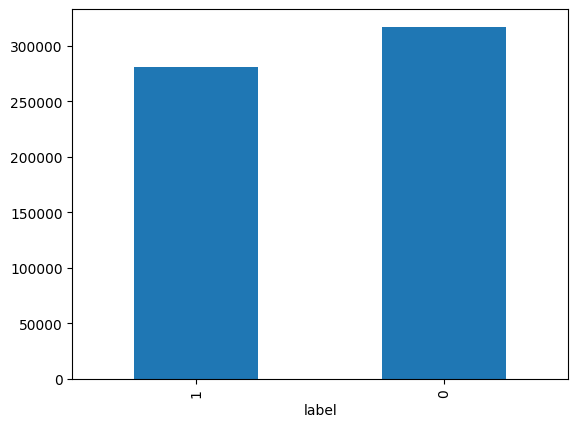

In [9]:
# Class distribution
print("0 : Non-Abusive")
print("1 : Abusive")
print(train_data['label'].value_counts())
print(train_data['label'].value_counts().sort_values().plot(kind = 'bar'))

language
Hindi         276331
Telugu         87343
Marathi        64932
Tamil          62542
Malayalam      36784
Bengali        20568
Kannada        12584
Odia            9857
Haryanvi        7981
Gujarati        7933
Bhojpuri        5215
Rajasthani      3917
Assamese        2550
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


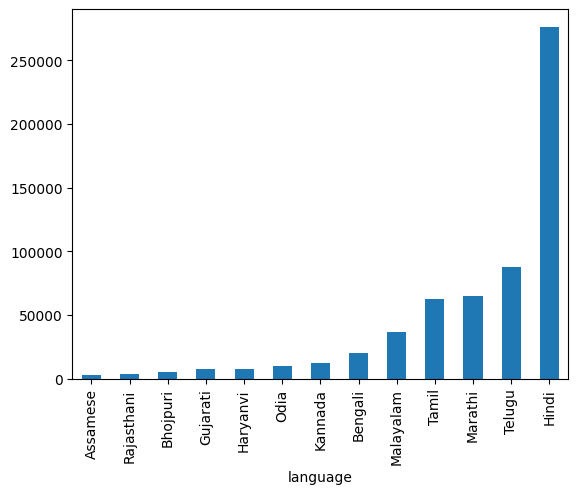

In [10]:
# Language data distribution
print(train_data['language'].value_counts())
print(train_data['language'].value_counts().sort_values().plot(kind = 'bar'))

In [11]:
col_labels = ['label']

In [12]:
len(train_data), len(test_data)

(598537, 74253)

In [14]:
# Handling NA values
train_data['commentText'].fillna("unknown", inplace=True)
validation_data['commentText'].fillna("unknown", inplace=True)

<ipython-input-14-97ad4a3e5698>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['commentText'].fillna("unknown", inplace=True)
<ipython-input-14-97ad4a3e5698>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [15]:
# Indic tokenizer for tokenization
import re, string
from indicnlp.tokenize import indic_tokenize
def tokenize(s): return indic_tokenize.trivial_tokenize(s)

In [17]:
# Using TF-IDF vectorizer to get word vectors from tokenized data
n = train_data.shape[0]

vec = TfidfVectorizer(ngram_range = (1,2), tokenizer = tokenize,
                      strip_accents = 'unicode', use_idf = True,
                      smooth_idf = True, sublinear_tf = True)

train_tf = vec.fit_transform(train_data['commentText'])
val_tf = vec.transform(validation_data['commentText'])

x = train_tf
val_x = val_tf

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:

# Method to calculate probability using naive baye's rule
def prob(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)


In [19]:
# Method to muliply word vectors with the naive baye's probability
def model(y):
    y = y.values
    r = np.log(prob(1,y) / prob(0,y))
    mod = LogisticRegression(C = 2, dual = False, solver = 'liblinear')
    x_nb = x.multiply(r)
    return mod.fit(x_nb, y), r

In [20]:
# Predicting labels
predictions = np.zeros((len(validation_data), len(col_labels)))

for i, j in enumerate(col_labels):
    print('fit', j)
    m,r = model(train_data[j])
    predictions = m.predict(val_x.multiply(r))

fit label


In [21]:
validation_data.head()

,language,post_index,commentText,report_count_comment,report_count_post,like_count_comment,like_count_post,val
286455,Haryanvi,102193,Panchkula me tere jisse Chootad laal liye firr...,0,0,0,0,0
542718,Marathi,210756,मस्त जोडि दादा ताई,0,0,0,0,0
375974,Telugu,355831,Na modda laga uvandi video puka,0,0,0,0,0
507349,Hindi,314303,𝙀𝙃𝘼 -_💘×❌ nahi nahi denger chudail👈😝ye thik ra...,0,0,0,0,0
505644,Hindi,214796,Khusi teri khusi meri na chod sakte na tod sak...,0,0,0,0,0


In [22]:
predictions = pd.DataFrame(predictions)

In [23]:
predictions.value_counts()

,count
0,
0,38268
1,28237


In [24]:
pred = pd.DataFrame({'language':validation_data['language'], 'label':y_val})

In [25]:
pred = pred.reset_index().drop(columns = ['index'])

In [26]:
pred['predicted'] = pd.DataFrame(predictions)

In [27]:
pred.head()

,language,label,predicted
0,Haryanvi,1,0
1,Marathi,0,0
2,Telugu,1,1
3,Hindi,1,0
4,Hindi,0,0


In [28]:
from sklearn.metrics import classification_report
print('Classification report for Validation dataset')
print(classification_report(pred['predicted'], pred['label'], target_names=['Non-Abusive','Abusive']))

Classification report for Validation dataset
              precision    recall  f1-score   support

 Non-Abusive       0.91      0.84      0.87     38268
     Abusive       0.80      0.89      0.84     28237

    accuracy                           0.86     66505
   macro avg       0.86      0.86      0.86     66505
weighted avg       0.87      0.86      0.86     66505



In [29]:
from sklearn.metrics import classification_report
print('Classification report for Validation dataset of Hindi Langauage')
print(classification_report(pred[pred['language']=='Hindi']['predicted'], pred[pred['language']=='Hindi']['label'], target_names=['Non-Abusive','Abusive']))


Classification report for Validation dataset of Hindi Langauage
              precision    recall  f1-score   support

 Non-Abusive       0.89      0.84      0.86     16276
     Abusive       0.83      0.88      0.86     14573

    accuracy                           0.86     30849
   macro avg       0.86      0.86      0.86     30849
weighted avg       0.86      0.86      0.86     30849



In [30]:
from sklearn.metrics import classification_report
print('Classification report for Validation dataset of Telugu Langauage')
print(classification_report(pred[pred['language']=='Telugu']['predicted'], pred[pred['language']=='Telugu']['label'], target_names=['Non-Abusive','Abusive']))


Classification report for Validation dataset of Telugu Langauage
              precision    recall  f1-score   support

 Non-Abusive       0.94      0.83      0.88      5565
     Abusive       0.80      0.93      0.86      4104

    accuracy                           0.87      9669
   macro avg       0.87      0.88      0.87      9669
weighted avg       0.88      0.87      0.87      9669

